# Установка библиотек

In [3]:
import pandas as pd #для работы с таблицами

Для автоматического применения статистического критерия (теста) используется модуль `stats` библиотеки `scipy`.

Этот модуль содержит большое количество вероятностных распределений, корреляционные функции и статистические тесты и многое другое.

Также активно используется библиотека `statsmodels`

Для установки библиотеки `scipy` и `statsmodels` можно воспользоваться менеджером пакетов `pip`.

In [2]:
!pip install scipy

In [3]:
!pip install statsmodels


# Загрузка данных

Для скачивания данных используем команду `!wget`. 

Данные появятся в локальной директории.

Мы будем использовать информацию о диаметре пицц разных производителей.

In [12]:
!wget https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Загрузим данные в память ноутбука.

In [6]:
data = pd.read_csv('new-site.csv', sep='\t')

In [15]:
# data.rename(columns={'Making Unit 1': 'Пиццерия №1', 'Making Unit 2': 'Пиццерия №2'}, inplace=True)

In [7]:
data.head()

,site,dwell-time
0,0,2
1,1,48
2,0,15
3,1,16
4,0,38


# Проверка данных на нормальность


In [8]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [9]:
alpha = 0.05

## Тест Шапиро-Уилка

In [10]:
from scipy.stats import shapiro

In [11]:
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


## Тест Д’Агостино

In [21]:
from scipy.stats import normaltest

In [22]:
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.251
Данные распределены нормально


# Независимый T-тест 

In [23]:
from scipy.stats import ttest_ind

In [24]:
H0 = 'Нет значимой разницы между диаметрами пиццы в разных пиццериях.'
Ha = 'Есть значимая разница между диаметрами пиццы в разных пиццериях.'

Зависимая переменная (диаметр пиццы) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [25]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['Пиццерия №1'], data['Пиццерия №2'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.47 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между диаметрами пиццы в разных пиццериях.


-----

# Корреляция Спирмана 

In [26]:
from numpy.random import rand
from scipy.stats import spearmanr

data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)


corr, p = spearmanr(data1, data2)

In [27]:
print(corr,p)

0.894914322914323 0.0


In [28]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.


# ANOVA тест

In [29]:
from scipy.stats import f_oneway

Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.

В качестве данных возьмем информацию по размерам раковины мидий, выращенных в разных местах.

In [30]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

8

In [31]:
_, p = f_oneway(petersburg, magadan, tvarminne)

In [32]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в трех разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в трех разных местах.'

In [33]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.007870900547143829 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.


_____

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [63]:
data_1 =pd.DataFrame({'Питер': [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105], 
                      'Магадан': [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764]})


In [66]:
import seaborn as sns

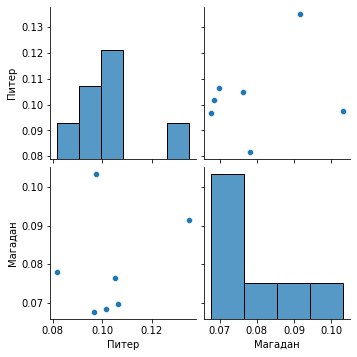

In [73]:
# Ну, данных недостаточно для каких-то выводов.
sns.pairplot(data_1)

In [79]:
print('Средний размер мидии в Питере: {}'.format(round(data_1['Питер'].mean(), 4)))
print('Средний размер мидии в Магадане: {}'.format(round(data_1['Магадан'].mean(), 4)))
# Видно, что размер мидии в Питере чуть больше, возможно это связано с уровнем потреблением.

Средний размер мидии в Питере: 0.1034
Средний размер мидии в Магадане: 0.0793


<AxesSubplot: >

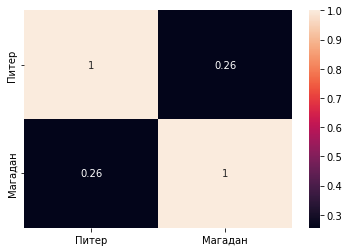

In [69]:
# Для теста возьмем просто корреляцию Пирсона, так тут колличественный значения.
sns.heatmap(data_1.corr(), annot=True)
# Наблюдается слабая связь между двамя признаками.

Error in callback <function _draw_all_if_interactive at 0x00000287F70125E0> (for post_execute):


ValueError: Invalid RGBA argument: 'Питер'

ValueError: Invalid RGBA argument: 'Питер'

<Figure size 504x72 with 1 Axes>

# Бонус

Скачаем датасет, содержащий информацию по давлению 120 человек.



In [8]:
!wget https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [34]:
data = pd.read_csv('blood_pressure.csv', sep=',')

In [35]:
print('Размер выборки: ', data.shape)

Размер выборки:  (120, 5)


In [36]:
data.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


## Z-тест

Проведем Z-тест для проверки двух независимых групп данных на равенство средних значений выборок.

In [37]:
from statsmodels.stats import weightstats

In [38]:
_ ,p = weightstats.ztest(data['bp_before'], x2=data['bp_after'], value=0,alternative='two-sided')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")

0.002162306611369422
Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.


## Z-тест на пропорцию

Z-критерий одной пропорции используется для сравнения наблюдаемой пропорции с теоретической.

В этом тесте используются следующие нулевые гипотезы:

$H_0: p = p_0$ (доля мужчин, предоставивших данные о своем давлении, равна гипотетической пропорции $p_0$)

Альтернативная гипотеза может быть двусторонней, левосторонней или правосторонней:

$H_1 (двусторонний): p ≠ p_0$ (доля мужчин не равна некоторому гипотетическому значению $p_0$)
$H_1 (левосторонний): p < p_0$ (доля мужчин меньше некоторого гипотетического значения $p_0$)
$H_1 (правосторонний): p > p_0$ (доля мужчин больше некоторого гипотетического значения $p_0$)

Предположим, что доля мужчин в нашем датачете равна 40%.

$p_0$: гипотетическая доля мужчин = 0.40

$x$: число мужчин в выборке мужчин: `len(data[data.sex == 'Male'])`

$n$: размер выборки = `len(data)`

Покажем, как использовать функцию `proportions_ztest` для выполнения  **z-теста**:

In [39]:
p_0 = 0.4
n = len(data)
x = len(data[data.sex == 'Male'])

print(n, x)

120 60


In [40]:
from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)

In [41]:
if p < 0.05:
    print("Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.
